# Προγραμματιστική άσκηση:
### Ταξινόμηση καρδιοτοκογραφικών σημάτων με βάση την μεταβλητότητα του καρδιακού ρυθμού

## Section 2
* ##### Load and store data to dataframe

In [3]:
import pandas as pd
import numpy as np  
from tqdm import tqdm
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm 
import glob
import re
import pyhrv.time_domain as td
import pathlib

In [4]:
"""
* Convert .dat files to .csv
* Create ann_db file for easier processing of additional annotations

@ Decomment the below command in order to execute in your own 

"""
# %run create_csv_database.py

'\n* Convert .dat files to .csv\n* Create ann_db file for easier processing of additional annotations\n\n@ Decomment the below command in order to execute in your own \n\n'

In [5]:
"""
* Convert .dat files to .csv
* Create ann_db dataframe for easier processing of additional annotations
"""
ann_db = pd.read_csv("database/ann_db.csv")
ann_db.rename(columns={'Unnamed: 0':'Labels'}, inplace=True)
ann_db = ann_db.set_index('Labels')
ann_db.head()

"""
* Initialize dataframe which we will apply 
    - methods for Heart Rate Variability (HRV) computation 
    based on Fatal Heart Rate signals (FHR)
    - correlation and other types of analysis
"""

def init_dataframe(path = "database/signals"):
    files = glob.glob(path + "/*.csv")
    data_frame = pd.DataFrame()

    for filename in files:
        name = re.sub("[^0-9]", "", filename)
        df = pd.read_csv(filename, index_col=None)
        data_frame = data_frame.append(
            {
                'tag': name,
                'Fhr': list(df['FHR']), 
                'pH': ann_db[name]['pH'],
                'Apgar1': ann_db[name]['Apgar1'],
                'Apgar5': ann_db[name]['Apgar5'],
                'labels': ann_db[name]
            },
            ignore_index=True
        )
    return data_frame

df = init_dataframe()
df.head()

,tag,Fhr,pH,Apgar1,Apgar5,labels
0,1001,"[150.5, 150.5, 151.0, 151.25, 151.25, 150.25, ...",7.14,6.0,8.0,Labels pH 7.14 BDecf ...
1,1002,"[146.25, 146.25, 150.25, 148.5, 148.5, 143.5, ...",7.00,8.0,8.0,Labels pH 7.00 BDecf ...
2,1003,"[137.5, 137.5, 137.5, 139.5, 139.5, 140.75, 14...",7.20,7.0,9.0,Labels pH 7.20 BDecf ...
3,1004,"[153.75, 153.75, 153.75, 154.75, 154.75, 153.7...",7.30,8.0,9.0,Labels pH 7.30 BDecf ...
4,1005,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",7.30,9.0,10.0,Labels pH 7.30 BDecf ...


### Data Description:
##### A short (non medically exhaustive) description of the feature meaning

**analysis of umbilical artery blood sample**
- **pH** : Is the ph of the blood of the baby (n.v. 7.35-7.45). A slight increase causes blood alkalosis while a slight decrease causes acidosis. Both conditions are extremely life threatening. This value is inverse proportional to **pCO2**.
- **BDecf** : Base excess of extracellular fluid is a quantity that reflects only the non-respiratory (metabolic) component of acid-base disturbances. (Reference : [Here](https://acutecaretesting.org/en/articles/all-about-base-excess--to-be-or-not-to-be))
- **pCO2** : is the relative pressure of CO2 in the blood (n.v. 4.5-6.0Kpa). In Respiratory Acidosis, **pH** and **pCO2** are inverse proportional while in Metabolic Acidosis they are directly proportional.
- **BE** : is the excess or deficit (if negative) of bases in the blood (e.g. HCO3). The normal range is between -2 and +2 mEq/L or mmol/L. A value above the range is indicative of Metabolic Alkalosis while below the range is indicative of Metabolic Acidosis.

- **Apgar1** : It's the Apgar score at 1min from birth. It indicates the overall health status of the baby at birth. It can have values between 0 and 10 where a score above 7 is considered good. (Reference and table : [Here](https://www.birthinjurysafety.org/birth-injuries/apgar-scoring-system.html))
- **Apgar5** : It's the Apgar score at 5min from birth. See **Apgar1**.
- **Gest. weeks** : It's the number of weeks of gestation where 39-40 weeks represent a normal term delivery.
- **Weight(g)** : Is the weigth of the baby in grams at birth. This is various but in general the normal range would be between 2500g and 4500g.
- **Sex** : This is a boolean for 1 and 2 where is not clear which is male/female but shouldn't matter.
- **Age** : The Age in years of the mom.
- **Gravidity** : Is the number of times the woman has been pregnant in her life.
- **Parity** : Is the number of times the woman has been pregnant for more than 24 weeks (in a single pregnancy).
- **Diabetes** : Boolean value for Diabetes of 0 (False) and 1 (True).
- **Hypertension** : Boolean value for Hypertension of 0 (False) and 1 (True).
- **Preeclampsia** : Boolean value for Preeclampsia of 0 (False) and 1 (True). where Preeclampsia indicate a disorder of pregnancy that could lead to complications.
- **Liq.** : It referes to Liquor which in this case is the Amniotic Fluid. I'm not sure why is a boolean in the data.
- **Pyrexia** : Is a boolean value that indicate the presence of pyrexia (high temperature) in the mom or not.
- **Meconium** : Is a boolean value that indicate the presence or not of Meconium which is the earliest stool of the baby that could happen before partum.
- **Presentation** : This indicate the presentation of the baby during delivery which can be head first, legs first etc. The problem here is that this value is a number which most probably refers to an internal classification or a scale I don't know how to interpret. **See also Deliv. type**
- **Induced** : Is a boolean value that indicate if the delivery has been medically induced.
- **I.stage** : It should indicate the time in between contractions in the stage of the delivery but this is only my observational opinon based on the data.
- **NoProgress** : Is a boolean value that indicate if there has been an abort of the pregnancy or not.
- **CK/KP** : It should refer to the level of Creatine Kinase?
- **II.stage** : see **I.stage**.
- **Deliv. type** : (1: vaginal; 2: operative vaginal; 3: CS)
- **dbID** : is just an ID of the record
- **Rec. type** : No idea
- **Pos. II.st.** : No idea

## Section 2
##### Functions for
- **noisy records removal**
- **large zero segments removal**
- **records that do not agree with restrictions** 
(such as casarean records, underage mothers and so on) **removal**
- **noise retrieval** (where noisy values predefined to 0) 

##### are defined

In [6]:
SEGMENT_SIZE = 25 # megalo SEGMENT_SIZE -> ligotero strict
NOISY_THRESH = 0.20 # mikro NOISY_THRESH -> perissotero  strict
NOISE_RETRV_THRESH = 0.25 # mikro NOISE_RETRV_THRESH -> perissotero smoothing
N_PREV_VALS = 10 # for calculating the median of N_PREV_VALS values for retrieve a zero measurment

In [7]:
def drop_restictions(df, name):
    records_to_drop = list()
    cc = ca = cd = cw = 0
    
    for i in range(df.shape[0]):
        if (df.iloc[i]['labels']['Deliv. type'] != 1.0):
            records_to_drop.append(i); cc+=1

        if (df.iloc[i]['labels']['Age'] < 18):
            records_to_drop.append(i); ca+=1

        if (df.iloc[i]['labels']['Hypertension'] == 1 or
            df.iloc[i]['labels']['Preeclampsia'] == 1 or 
            df.iloc[i]['labels']['Diabetes'] == 1):
            records_to_drop.append(i); cd+=1

        if (df.iloc[i]['labels']['Gest. weeks'] < 37.5):
            records_to_drop.append(i); cw+=1
    
    print('--',name,'--')
    print(cw,' underweeked records dropped')
    print(cd,' diseased records dropped')
    print(ca,' underage records dropped')
    print(cc,' casarean records dropped')
    
    print(len(records_to_drop), 'total records dropped')
    return df.drop(records_to_drop).reset_index().drop('index', axis=1)

In [8]:
def drop_noisy_records(df, thresh=0.2):
    noisy_records = list()
    
    for i in range(df.shape[0]):
        record = df.iloc[i]
        perc_zeros = record['Fhr'].count(0) / len(record['Fhr'])
        if( perc_zeros > thresh ):
            noisy_records.append(i)    
    return  df.drop(noisy_records).reset_index().drop('index', axis=1)

In [9]:
def drop_zero_segments(df_input, segment_size = 20):
    df = df_input.copy()
    
    for row_i , fhr in df_input['Fhr'].iteritems():
        fhr_list = list(fhr) # get fhr of record row_i as list
        fhr_list_out = list() # set an empty list
        count = 0
        for j, value in enumerate(fhr_list):     
            if(value == 0):
                count += 1                
            else:
                if(count >= segment_size):
                    fhr_list_out = fhr_list_out[:-count]
                count = 0    
            fhr_list_out.append(value)
        df.at[row_i, 'Fhr'] = fhr_list_out
        
    return df

In [10]:
from statistics import median 

def get_median(lst, index, n_prev_vals):
    medians = list()
    for i in range(index, 0, -1):
        if(lst[i] != 0):
            medians.append(lst[i])
        if(len(medians)==n_prev_vals):
            return median(medians)

    return median(lst)
            
def noise_retrieval(df_input, thres = 0.25, n_prev_vals=3):
    df = df_input.copy()
    for row_i , fhr in df['Fhr'].iteritems():
        fhr_new = list()
        for i in range(len(fhr)):
            prev_values_med = get_median(fhr, i, n_prev_vals)
            if(fhr[i] > prev_values_med + prev_values_med * thres or 
            fhr[i] < prev_values_med - prev_values_med * thres ):
                fhr_new.append(prev_values_med)
            else: 
                fhr_new.append(fhr[i])
        df.at[row_i,'Fhr'] = fhr_new
        
    return df 

In [11]:
df_r = drop_restictions(df,'df')
df_r_n = drop_noisy_records(df_r,thresh=NOISY_THRESH)
df_r_n_zs = drop_zero_segments(df_r_n, segment_size=SEGMENT_SIZE)
df_r_n_zs = df_r_n_zs.set_index('tag')
df_r_n_zs_sm = noise_retrieval(df_r_n_zs, thres=NOISE_RETRV_THRESH, n_prev_vals=N_PREV_VALS)

-- df --
18  underweeked records dropped
86  diseased records dropped
0  underage records dropped
46  casarean records dropped
150 total records dropped


In [12]:
df_r_n_zs_sm

,Fhr,pH,Apgar1,Apgar5,labels
tag,,,,,
1002,"[146.25, 146.25, 150.25, 148.5, 148.5, 143.5, ...",7.00,8.0,8.0,Labels pH 7.00 BDecf ...
1004,"[153.75, 153.75, 153.75, 154.75, 154.75, 153.7...",7.30,8.0,9.0,Labels pH 7.30 BDecf ...
1008,"[124.0, 124.0, 124.0, 124.0, 124.0, 124.0, 124...",7.36,8.0,9.0,Labels pH 7.36 BDecf ...
1011,"[149.5, 149.75, 149.75, 150.0, 150.0, 150.25, ...",7.37,8.0,9.0,Labels pH 7.37 BDecf ...
1014,"[145.0, 145.0, 146.0, 145.5, 145.5, 146.5, 146...",7.14,9.0,9.0,Labels pH 7.14 BDecf ...
...,...,...,...,...,...
1499,"[140.25, 136.25, 136.25, 139.5, 140.25, 140.25...",7.24,9.0,10.0,Labels pH 7.24 BDecf ...
1502,"[114.5, 114.5, 114.5, 114.5, 114.5, 114.5, 114...",7.26,9.0,10.0,Labels pH 7.26 BDecf ...
1503,"[127.75, 127.75, 127.75, 131.5, 131.5, 132.75,...",7.31,9.0,10.0,Labels pH 7.31 BDecf ...


## Section 3
### Experiments

* ##### Methods applied for Heart Rate Variability
- **sdnn**
- **rmssd**
- **sdann** 
- **nn20**

* ##### Types for correlation calculation
- **Pearson**
- **Spearman**
- **Kendall rank** 

In [13]:
def compute_hrv(df_input):
    df = df_input.copy()
    
    sdnn = list(); rmssd = list(); sdann = list(); nn20 = list()
    for row_i, fhr in tqdm(df['Fhr'].iteritems(), total=df.shape[0]):
        sdnn.append(td.sdnn(np.array(df.loc[row_i]['Fhr']))[0])
        rmssd.append(td.rmssd(np.array(df.loc[row_i]['Fhr']))[0])
        sdann.append(td.sdann(np.array(df.loc[row_i]['Fhr']))[0])
        nn20.append(td.nn20(np.array(df.loc[row_i]['Fhr']))[0])

    df['sdnn'] = sdnn
    df['rmssd'] = rmssd
    df['sdann'] = sdann
    df['nn20'] = nn20
    
    return df 

df_fin = compute_hrv(df_r_n_zs_sm)
df_fin.head()

  0%|          | 0/234 [00:00<?, ?it/s]

,Fhr,pH,Apgar1,Apgar5,labels,sdnn,rmssd,sdann,nn20
tag,,,,,,,,,
1002,"[146.25, 146.25, 150.25, 148.5, 148.5, 143.5, ...",7.00,8.0,8.0,Labels pH 7.00 BDecf ...,24.151512,2.788846,17.799355,67
1004,"[153.75, 153.75, 153.75, 154.75, 154.75, 153.7...",7.30,8.0,9.0,Labels pH 7.30 BDecf ...,22.216154,1.894141,20.632604,23
1008,"[124.0, 124.0, 124.0, 124.0, 124.0, 124.0, 124...",7.36,8.0,9.0,Labels pH 7.36 BDecf ...,14.888796,2.232269,8.652947,47
1011,"[149.5, 149.75, 149.75, 150.0, 150.0, 150.25, ...",7.37,8.0,9.0,Labels pH 7.37 BDecf ...,22.151290,2.805503,18.777693,40
1014,"[145.0, 145.0, 146.0, 145.5, 145.5, 146.5, 146...",7.14,9.0,9.0,Labels pH 7.14 BDecf ...,23.719984,2.866754,15.362750,93


In [14]:
df_fin.to_csv('s3a.csv', columns=['pH', 'sdnn', 'rmssd', 'sdann', 'nn20'])
df_fin.to_excel('s3a.xlsx', columns=['pH', 'sdnn', 'rmssd', 'sdann', 'nn20'])

In [50]:
from scipy.stats import pearsonr, spearmanr, kendalltau

def get_correlation(df, clmn1='sdnn', clmn2='pH'):
    results = {'pearsonr':list(), 'spearmanr':list(), 'kendalltau':list()}
    results['pearsonr'].append( 
        pearsonr(
            df[clmn1] ,
            df[clmn2]
        )
    )
    results['spearmanr'].append( 
        spearmanr(
            df[clmn1] ,
            df[clmn2]
        )
    )
    results['kendalltau'].append( 
        kendalltau(
            df[clmn1] ,
            df[clmn2]
        )
    )
    return results

print(get_correlation(df_fin, clmn1='sdnn')['pearsonr'])
print(get_correlation(df_fin, clmn1='sdnn')['spearmanr'])
print(get_correlation(df_fin, clmn1='sdnn')['kendalltau'])

print(get_correlation(df_fin, clmn1='rmssd')['pearsonr'])
print(get_correlation(df_fin, clmn1='rmssd')['spearmanr'])
print(get_correlation(df_fin, clmn1='rmssd')['kendalltau'])

print(get_correlation(df_fin, clmn1='sdann')['pearsonr'])
print(get_correlation(df_fin, clmn1='sdann')['spearmanr'])
print(get_correlation(df_fin, clmn1='sdann')['kendalltau'])

print(get_correlation(df_fin, clmn1='nn20')['pearsonr'])
print(get_correlation(df_fin, clmn1='nn20')['spearmanr'])
print(get_correlation(df_fin, clmn1='nn20')['kendalltau'])

[(-0.39567672298754225, 3.4212584110687123e-10)]
[SpearmanrResult(correlation=-0.3630261830842476, pvalue=1.0663693073153829e-08)]
[KendalltauResult(correlation=-0.2544193541309007, pvalue=1.1415314627407688e-08)]
[(-0.22905412563779895, 0.00041216899652788005)]
[SpearmanrResult(correlation=-0.21662109804196714, pvalue=0.0008511090930319263)]
[KendalltauResult(correlation=-0.1469423631665653, pvalue=0.0009777676925193496)]
[(-0.2706068641927098, 2.7182358397645852e-05)]
[SpearmanrResult(correlation=-0.21596877588695956, pvalue=0.0008831515300084195)]
[KendalltauResult(correlation=-0.14738956285157645, pvalue=0.0009434114119386287)]
[(-0.2453256683229023, 0.000150188912390355)]
[SpearmanrResult(correlation=-0.26355613281804574, pvalue=4.4562264631637314e-05)]
[KendalltauResult(correlation=-0.18263904182695442, pvalue=4.551262291803253e-05)]


<AxesSubplot:title={'center':'nn20: corr=-0.245 p=0.0'}>

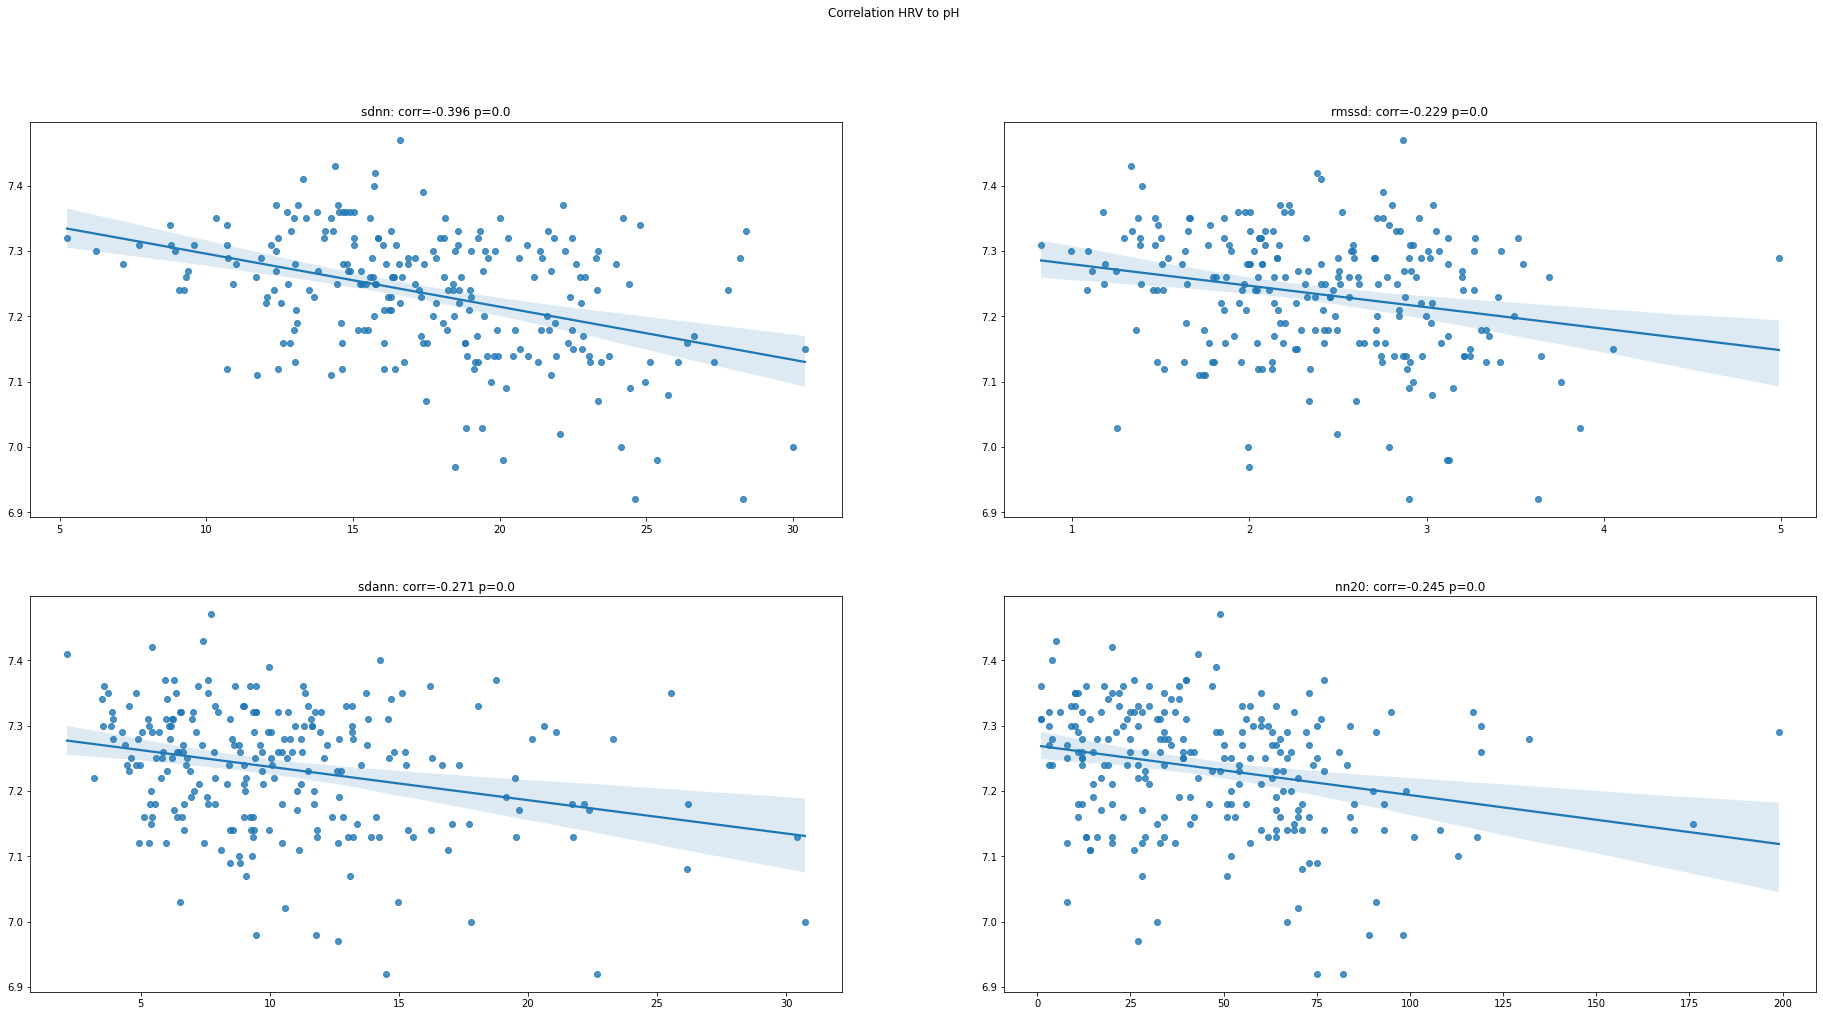

In [51]:
import seaborn as sns

fig, axes = plt.subplots(2, 2, figsize=(32, 16))
fig.suptitle('Correlation HRV to pH')
axes[0][0].set_title('sdnn: corr=' + str(round(get_correlation(df_fin, clmn1='sdnn')['pearsonr'][0][0],3)) + ' p=' + str(round(get_correlation(df_fin, clmn1='sdnn')['pearsonr'][0][1],3))); 
axes[0][1].set_title('rmssd: corr=' + str(round(get_correlation(df_fin, clmn1='rmssd')['pearsonr'][0][0],3)) + ' p=' + str(round(get_correlation(df_fin, clmn1='rmssd')['pearsonr'][0][1],3))); 
axes[1][0].set_title('sdann: corr=' + str(round(get_correlation(df_fin, clmn1='sdann')['pearsonr'][0][0],3)) + ' p=' + str(round(get_correlation(df_fin, clmn1='sdann')['pearsonr'][0][1],3))); 
axes[1][1].set_title('nn20: corr=' + str(round(get_correlation(df_fin, clmn1='nn20')['pearsonr'][0][0],3)) + ' p=' + str(round(get_correlation(df_fin, clmn1='nn20')['pearsonr'][0][1],3))); 

sns.regplot(ax=axes[0][0], x=[hrv_val for _, hrv_val in df_fin['sdnn'].iteritems()], y=[hrv_val for _, hrv_val in df_fin['pH'].iteritems()])
sns.regplot(ax=axes[0][1], x=[hrv_val for _, hrv_val in df_fin['rmssd'].iteritems()], y=[hrv_val for _, hrv_val in df_fin['pH'].iteritems()])
sns.regplot(ax=axes[1][0], x=[hrv_val for _, hrv_val in df_fin['sdann'].iteritems()], y=[hrv_val for _, hrv_val in df_fin['pH'].iteritems()])
sns.regplot(ax=axes[1][1], x=[hrv_val for _, hrv_val in df_fin['nn20'].iteritems()], y=[hrv_val for _, hrv_val in df_fin['pH'].iteritems()])
